In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.neural_network import MLPClassifier

In [2]:
df_time_series = pd.read_csv("ec2_cpu_utilization_24ae8d.csv")
df_time_series = df_time_series['value']

df_time_series.head(36)

0     0.132
1     0.134
2     0.134
3     0.134
4     0.134
5     0.134
6     0.134
7     0.134
8     0.066
9     0.132
10    0.134
11    0.066
12    0.132
13    0.202
14    0.068
15    0.134
16    0.132
17    0.134
18    0.134
19    0.136
20    0.132
21    0.134
22    0.134
23    0.066
24    0.134
25    0.134
26    0.066
27    0.134
28    0.134
29    0.134
30    0.132
31    0.136
32    0.134
33    0.134
34    0.132
35    0.132
Name: value, dtype: float64

<AxesSubplot:>

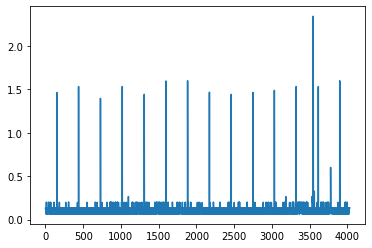

In [3]:
df_time_series.plot()

In [4]:
window_size = 12

num_rows = len(df_time_series)

# Drop last remainder frames
remainder = num_rows % window_size
num_parts = (num_rows - remainder) / window_size

print(num_parts)

# Dropping last n rows using drop
if remainder > 0:
    df_time_series.drop(df_time_series.tail(remainder).index, inplace = True)

336.0


In [5]:
x = np.array(np.array_split(df_time_series, num_parts))

x

array([[0.132, 0.134, 0.134, ..., 0.132, 0.134, 0.066],
       [0.132, 0.202, 0.068, ..., 0.134, 0.134, 0.066],
       [0.134, 0.134, 0.066, ..., 0.134, 0.132, 0.132],
       ...,
       [0.066, 0.202, 0.068, ..., 0.134, 0.066, 0.134],
       [0.134, 0.132, 0.068, ..., 0.134, 0.136, 0.066],
       [0.134, 0.134, 0.132, ..., 0.134, 0.134, 0.134]])

In [6]:
print("X: {}".format(x[0]))
print("Y: {}".format(x[1][0]))

X: [0.132 0.134 0.134 0.134 0.134 0.134 0.134 0.134 0.066 0.132 0.134 0.066]
Y: 0.132


In [7]:
print("X: {}".format(x[1]))
print("Y: {}".format(x[2][0]))

X: [0.132 0.202 0.068 0.134 0.132 0.134 0.134 0.136 0.132 0.134 0.134 0.066]
Y: 0.134


In [8]:
print("X: {}".format(x[2]))
print("Y: {}".format(x[3][0]))

X: [0.134 0.134 0.066 0.134 0.134 0.134 0.132 0.136 0.134 0.134 0.132 0.132]
Y: 0.134


In [9]:
x_training = []
y_training = []

for i in range(len(x)):
    if i == len(x) - 1:
        break
    
    x_training.append(x[i])
    y_training.append(x[i+1][0])

In [10]:
from sklearn import linear_model
#model = linear_model.LassoLars(alpha=.1, normalize=False)
model = linear_model.BayesianRidge()
model.fit(x_training, y_training)

BayesianRidge()

In [11]:
print(model.predict([x[1]]))

[0.12502115]


<AxesSubplot:>

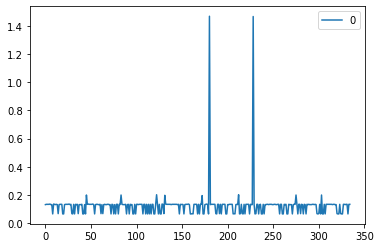

In [12]:
y_df = pd.DataFrame(y_training)

y_df.plot()

<AxesSubplot:>

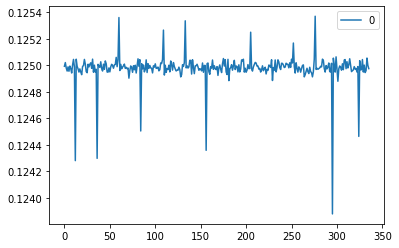

In [13]:
y_preds = model.predict(x)

y_preds_df = pd.DataFrame(y_preds)

y_preds_df.plot()